Então eu tenho um modelo financeiro em que eu tenho uma série temporal e vários fundos de investimento em que os clientes podem aportar ou não dependendo os valores de performance desses fundos e eu quero calcular a importância desses valores, como que eu faço isso? qual é o modelo python em que eu posso ter sei lá, valores mês a mês de várias janelas de performance do fundo e calcular temporalmente qual é o valor que o cliente considerou o mais importante para manter o fundo na carteira, e quando eu falo manter é o valor financeiro maior que ele aloca no fundo, qual é o modelo?


### GPT 4

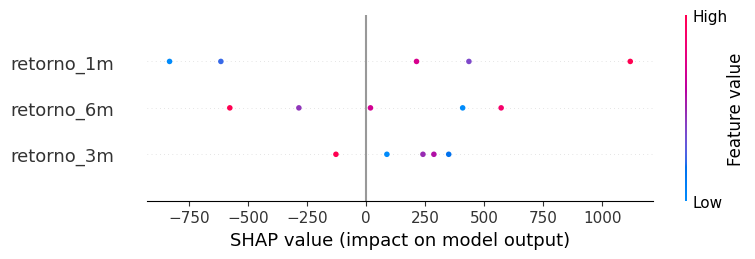

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import shap

# Exemplo de dados
df = pd.DataFrame({
    'data': pd.date_range(start='2020-01-01', periods=24, freq='M'),
    'fundo_id': np.random.choice(['Fundo A', 'Fundo B'], size=24),
    'retorno_1m': np.random.uniform(-0.05, 0.05, size=24),
    'retorno_3m': np.random.uniform(-0.10, 0.10, size=24),
    'retorno_6m': np.random.uniform(-0.15, 0.15, size=24),
    'alocacao': np.random.uniform(1000, 10000, size=24)
})

# Features e Target
X = df[['retorno_1m', 'retorno_3m', 'retorno_6m']]
y = df['alocacao']

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Feature Importance com SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Visualização
shap.summary_plot(shap_values, X_test)

### DeepSeek - Modelo exemplo original

RMSE Regressão Linear: 1.0155304170251283e-06
RMSE Random Forest: 5.015765484924147


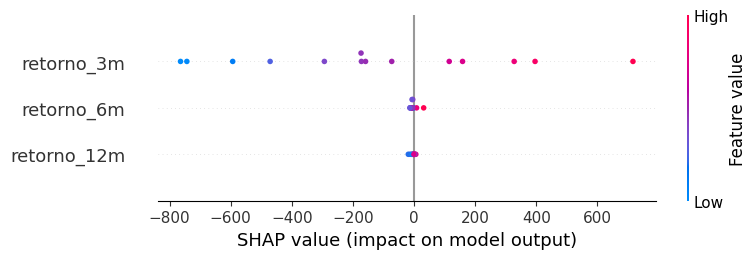

In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import shap

# Exemplo de dados
# Suponha que você tenha um DataFrame com as seguintes colunas:
# - data: data da observação
# - fundo: identificador do fundo
# - retorno_3m, retorno_6m, retorno_12m: retornos acumulados em diferentes janelas
# - valor_alocado: valor financeiro alocado pelo cliente no fundo

# Carregar dados
dados = pd.read_csv('dados_fundos_sinteticos.csv')

# Engenharia de features
dados['retorno_3m'] = dados.groupby(['fundo'])['retorno'].rolling(window=3).mean().reset_index(level=0, drop=True)
dados['retorno_6m'] = dados.groupby('fundo')['retorno'].rolling(window=6).mean().reset_index(level=0, drop=True)
dados['retorno_12m'] = dados.groupby('fundo')['retorno'].rolling(window=12).mean().reset_index(level=0, drop=True)

# Remover NaNs gerados pelas janelas temporais
dados = dados.dropna()

# Definir variáveis independentes (X) e dependente (y)
X = dados[['retorno_3m', 'retorno_6m', 'retorno_12m']]
y = dados['valor_alocado']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Regressão Linear
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)
y_pred_lr = modelo_lr.predict(X_test)
print('RMSE Regressão Linear:', np.sqrt(mean_absolute_error(y_test, y_pred_lr)))

# Modelo Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)
print('RMSE Random Forest:', np.sqrt(mean_absolute_error(y_test, y_pred_rf)))

# Interpretação com SHAP
explainer = shap.TreeExplainer(modelo_rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

### Gerar df

In [7]:
import pandas as pd
import numpy as np

# Configurar seed para reprodutibilidade
np.random.seed(42)

# Criar datas mensais (exemplo: 3 anos de dados)
datas = pd.date_range(start = '2020-01-01', end='2022-12-31', freq='M')

# Número de fundos e clientes
n_fundos = 3    # Fundo A, B, C
n_clientes = 100

# Criar DataFrame
dados = pd.DataFrame({
    'data': np.repeat(datas, n_fundos), # Repetir datas para cada fundo
    'fundo': np.tile(['Fundo_A', 'Fundo_B', 'Fundo_C'], len(datas)),    # Alternar fundos
})

# Adicionar retornos aleatórios (exemplo: média 0.5%, desvio padrão 2%)
dados['retorno'] = np.random.normal(loc = 0.005, scale=0.02, size=len(dados))

# Simular valores alocadores com base nos retornos passados (exemplo simplista)
# Suponha que o valor alocado depende dos retornos dos últimos 3 meses
for fundo in ['Fundo_A', 'Fundo_B', 'Fundo_C']:
    mask = dados['fundo'] == fundo
    dados.loc[mask, 'valor_alocado'] = 1000 + 500 * dados.loc[mask, 'retorno'].rolling(window=3).mean() * 100   # Aporte depende do retorno médio

# Remover NaNs gerados pelas janelas
dados = dados.dropna()

# Salvar como CSV (opcional)
dados.to_csv('dados_fundos_sinteticos.csv', index=False)

# Visualizar os primeiros registros
print(dados.head())

         data    fundo   retorno  valor_alocado
6  2020-03-31  Fundo_A  0.036584    2449.652275
7  2020-03-31  Fundo_B  0.020349    1381.672351
8  2020-03-31  Fundo_C -0.004389    1231.359065
9  2020-04-30  Fundo_A  0.015851    2464.934239
10 2020-04-30  Fundo_B -0.004268    1273.287887
